In [1]:
! git clone "https://github.com/gdbwoo/DS-3001-Projects"

Cloning into 'DS-3001-Projects'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 20 (delta 2), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (20/20), 7.66 MiB | 4.95 MiB/s, done.
Resolving deltas: 100% (2/2), done.


In [38]:
# Import all packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Observe all unfiltered data
df_all = pd.read_parquet('DS-3001-Projects/Project 1/gss_chunk_3.parquet')
print(df_all.shape, '\n')
df_all.head()

(24130, 6694) 



,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
0,2006,1751,working full time,40.0,NaN,NaN,NaN,NaN,someone else,government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.079141,0.961150
1,2006,1752,in school,NaN,NaN,yes,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.673834,6.641571
2,2006,1753,working full time,35.0,NaN,NaN,NaN,NaN,someone else,government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.584663,0.512145
3,2006,1754,working full time,50.0,NaN,NaN,NaN,NaN,someone else,government,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.715731,0.637592
4,2006,1755,working full time,40.0,NaN,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.094831,0.956094


In [4]:
year = df_all['year']
print(year.unique(), '\n')

[2006 2008 2010 2012 2014 2016 2018 2021 2022] 



In [5]:
# Make new dataframe with years 2022, 2021, 2018

#df = df_all.loc[(df_all['year'] == 2022)]
df = df_all.loc[(df_all['year'] == 2022) | (df_all['year'] == 2021) | (df_all['year'] == 2018)]
print(df.shape, '\n')
df.head()

(9924, 6694) 



,year,id,wrkstat,hrs1,hrs2,evwork,occ,prestige,wrkslf,wrkgovt,...,agehef12,agehef13,agehef14,hompoph,wtssps_nea,wtssnrps_nea,wtssps_next,wtssnrps_next,wtsscomp,wtsscompnr
14206,2018,1,"with a job, but not at work because of tempora...",NaN,41.0,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.908104,2.244275
14207,2018,2,retired,NaN,NaN,yes,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.914550,1.095217
14208,2018,3,working full time,40.0,NaN,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.609109,0.740432
14209,2018,4,working full time,40.0,NaN,NaN,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.642403,0.769342
14210,2018,5,retired,NaN,NaN,yes,NaN,NaN,someone else,private,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.396347,0.462239


In [6]:
# Confirm all data is from correct years: 2022, 2021, 2018
year = df['year']
print(year.unique(), '\n')

[2018 2021 2022] 



In [7]:
# Select the columns we want to use: mntlhtlh, hrs2, income16, wrkslf
df = df.loc[:,['mntlhlth','hrs2','income16', 'wrkslf']]
print(df.shape, '\n')
print(df.head())


(9924, 4) 

       mntlhlth  hrs2              income16        wrkslf
14206      20.0  41.0                   NaN  someone else
14207       NaN   NaN    $30,000 to $34,999  someone else
14208       3.0   NaN  $150,000 to $169,999  someone else
14209       1.0   NaN      $170,000 or over  someone else
14210       NaN   NaN      $170,000 or over  someone else


In [8]:
# Remove all nan/missing values
df = df.dropna()
print(df.shape, '\n')
print(df.head())

(120, 4) 

       mntlhlth  hrs2              income16        wrkslf
14293       0.0  40.0      $170,000 or over  someone else
14296       1.0  45.0   $90,000 to $109,999  someone else
14303       0.0  50.0  $130,000 to $149,999  someone else
14310       0.0  24.0    $60,000 to $74,999  someone else
14444       0.0  15.0  $150,000 to $169,999  someone else


In [9]:
# Make a copy of the mntlhlth column
# mntlhlth: days of poor mental health past 30 days, for how many days during the past 30 days was your mental health not good?
# mental health: stress, depression, problems with emotions
mh = df['mntlhlth']
print(mh.unique(), '\n')
mh.value_counts()

[ 0.  1.  2. 10. 14.  5. 30.  3. 15. 25.  4. 20.  6.  7.  8. 12.] 



0.0     51
30.0    13
5.0     11
2.0      9
10.0     7
15.0     6
1.0      4
3.0      4
14.0     3
4.0      3
20.0     3
25.0     2
6.0      1
7.0      1
8.0      1
12.0     1
Name: mntlhlth, dtype: int64

In [10]:
# Confirm there are no missing values
print('Total missing: ', sum(mh.isnull()))

Total missing:  0


In [11]:
# number of hours worked per week
hoursworked = df["hrs2"]
hoursworked.value_counts()

40.0    49
50.0    16
45.0     5
35.0     5
30.0     4
60.0     4
25.0     4
48.0     3
10.0     3
55.0     3
38.0     2
80.0     2
36.0     2
70.0     2
6.0      2
15.0     2
24.0     2
84.0     1
12.0     1
46.0     1
9.0      1
42.0     1
32.0     1
1.0      1
66.0     1
21.0     1
52.0     1
Name: hrs2, dtype: int64

In [12]:
print('Total missing: ', sum(hoursworked.isnull()))

Total missing:  0


In [41]:
# income brackets
income = df["income16"]
income.value_counts()
#print(income.unique(), '\n')
#income.dtype

$60,000 to $74,999      19
$170,000 or over        14
$90,000 to $109,999     14
$50,000 to $59,999      12
$40,000 to $49,999       7
$75,000 to $89,999       7
$30,000 to $34,999       7
$35,000 to $39,999       6
$110,000 to $129,999     5
$20,000 to $22,499       4
$25,000 to $29,999       4
$130,000 to $149,999     4
$150,000 to $169,999     4
$17,500 to $19,999       3
$7,000 to $7,999         2
under $1,000             2
$22,500 to $24,999       1
$1,000 to $2,999         1
$15,000 to $17,499       1
$12,500 to $14,999       1
$10,000 to $12,499       1
$5,000 to $5,999         1
Name: income16, dtype: int64

In [14]:
# Remove all unused categories
income = income.cat.remove_unused_categories()  # source: https://stackoverflow.com/questions/62090972/why-does-pandas-value-counts-show-a-count-of-zero-for-some-values
income.value_counts()

$60,000 to $74,999      19
$170,000 or over        14
$90,000 to $109,999     14
$50,000 to $59,999      12
$40,000 to $49,999       7
$75,000 to $89,999       7
$30,000 to $34,999       7
$35,000 to $39,999       6
$110,000 to $129,999     5
$20,000 to $22,499       4
$25,000 to $29,999       4
$130,000 to $149,999     4
$150,000 to $169,999     4
$17,500 to $19,999       3
$7,000 to $7,999         2
under $1,000             2
$22,500 to $24,999       1
$1,000 to $2,999         1
$15,000 to $17,499       1
$12,500 to $14,999       1
$10,000 to $12,499       1
$5,000 to $5,999         1
Name: income16, dtype: int64

In [15]:
print('Total missing: ', sum(income.isnull()))

Total missing:  0


In [45]:
income = income.replace(['under $1,000', '$1,000 to $2,999', '$5,000 to $5,999', '$7,000 to $7,999', '$10,000 to $12,499',
                         '$12,500 to $14,999', '$15,000 to $17,499', '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
                         '$25,000 to $29,999', '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $49,999', '$50,000 to $59,999'],'Lower')
income = income.replace(['$60,000 to $74,999', '$75,000 to $89,999', '$90,000 to $109,999', '$110,000 to $129,999', '$130,000 to $149,999'],'Middle')
income = income.replace(['$150,000 to $169,999', '$170,000 or over'],'Upper')
income.value_counts()

Lower     53
Middle    49
Upper     18
Name: income16, dtype: int64

In [46]:
# Replace original income column with cleaned income column for updated dataframe
df['income16'] = income
df['income16'].value_counts()

Lower     53
Middle    49
Upper     18
Name: income16, dtype: int64

In [47]:
# self employed or not
employment = df["wrkslf"]
employment.value_counts()

someone else     106
self-employed     14
Name: wrkslf, dtype: int64

In [48]:
# Remove all unused categories
employment = employment.cat.remove_unused_categories()
employment.value_counts()

someone else     106
self-employed     14
Name: wrkslf, dtype: int64

In [49]:
print('Total missing: ', sum(employment.isnull()))

Total missing:  0


In [50]:
# Replace original self employed column with cleaned self-employed column for updated dataframe
df['wrkslf'] = employment
df['wrkslf'].value_counts()

someone else     106
self-employed     14
Name: wrkslf, dtype: int64

In [21]:
# Data Visualization

<Axes: xlabel='hrs2', ylabel='Count'>

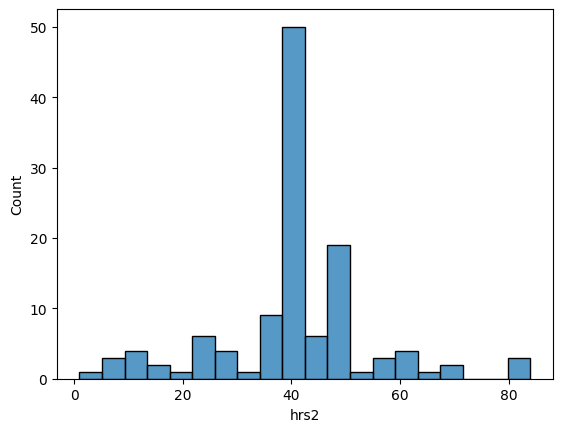

In [51]:
sns.histplot(data=df,x='hrs2')

<Axes: xlabel='wrkslf', ylabel='Count'>

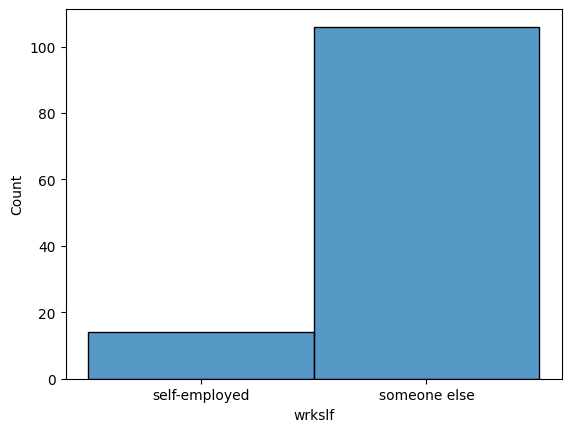

In [52]:
sns.histplot(data=df,x='wrkslf')

<Axes: xlabel='hrs2', ylabel='Count'>

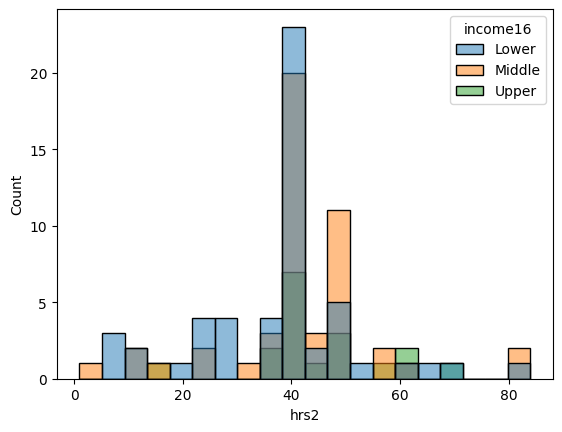

In [53]:
sns.histplot(data=df,x='hrs2', hue='income16')

<Axes: xlabel='hrs2', ylabel='Density'>

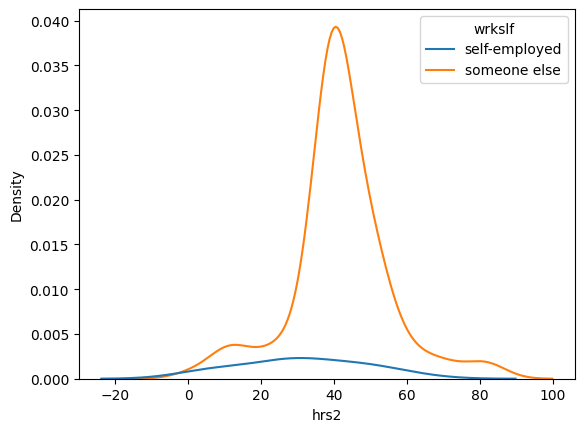

In [26]:
# kernel density plot
sns.kdeplot(data=df,x='hrs2',hue='wrkslf')

<Axes: xlabel='hrs2', ylabel='Density'>

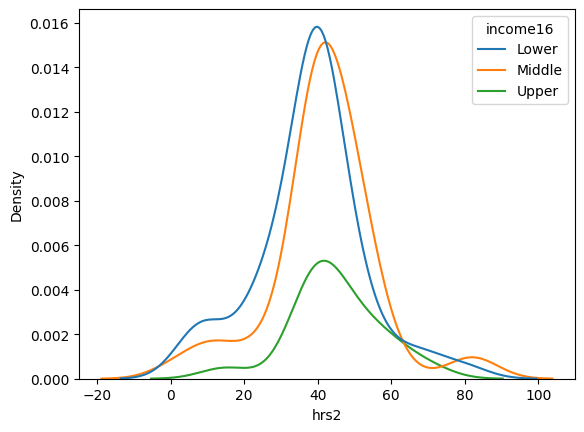

In [54]:
sns.kdeplot(data=df,x='hrs2',hue='income16')
#plt.savefig("seaborn_plot.png")

<Axes: xlabel='hrs2'>

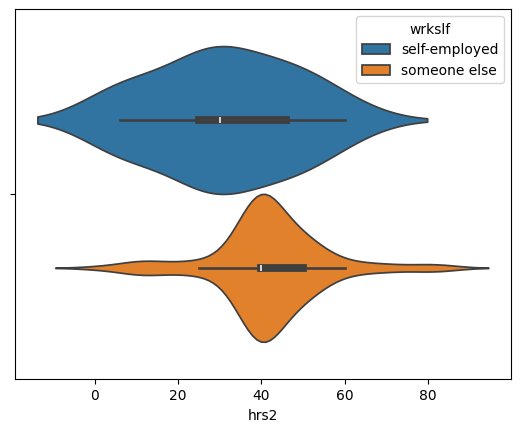

In [28]:
sns.violinplot(data=df,x='hrs2',hue='wrkslf')

<Axes: xlabel='hrs2'>

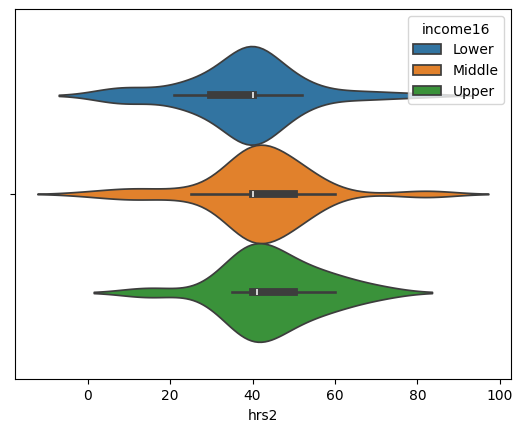

In [55]:
sns.violinplot(data=df,x='hrs2',hue='income16')

<Axes: xlabel='hrs2'>

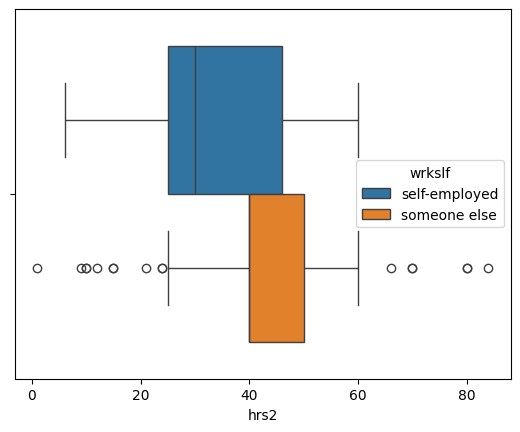

In [32]:
sns.boxplot(data=df,x='hrs2', hue='wrkslf')

<Axes: xlabel='hrs2'>

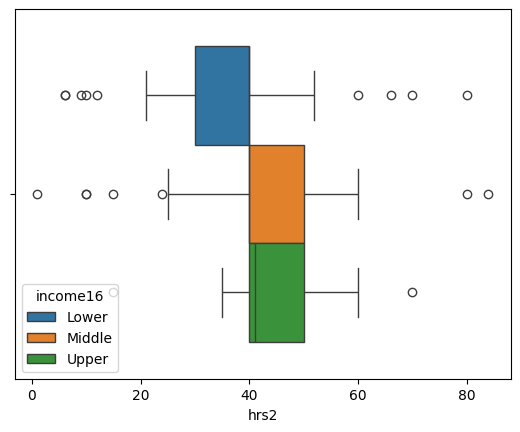

In [56]:
sns.boxplot(data=df,x='hrs2', hue='income16')

<Axes: xlabel='hrs2', ylabel='mntlhlth'>

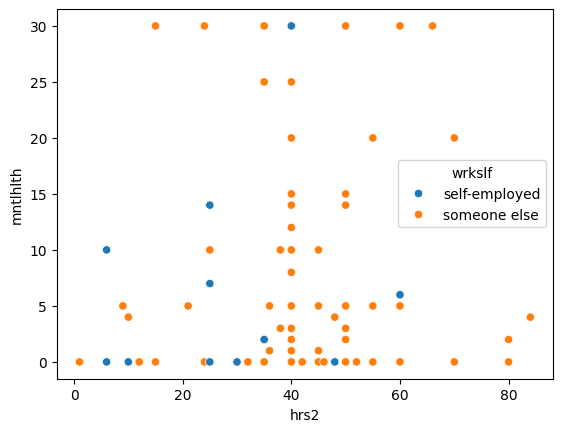

In [30]:
sns.scatterplot(data=df,x='hrs2',y='mntlhlth', hue='wrkslf')

<Axes: xlabel='hrs2', ylabel='mntlhlth'>

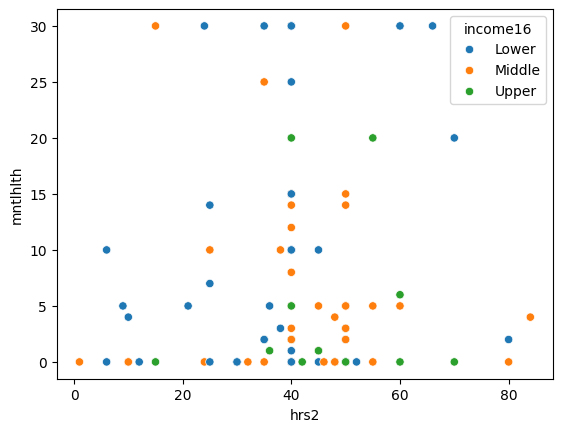

In [57]:
sns.scatterplot(data=df,x='hrs2',y='mntlhlth', hue='income16')